<a href="https://colab.research.google.com/github/gita-liferishi/dp-llm-unlearning/blob/main/DATA_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# mount google drive for retrieving
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np

In [ ]:
import pandas as pd

# Provide the full file path
file_path = "Homework/data_1800.csv"

# Read the CSV into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows
df.head()

,GKGRECORDID,DATE,SourceCollectionIdentifier,SourceCommonName,DocumentIdentifier,Counts,V2Counts,Themes,V2Themes,Locations,...,BookMeta_ScanningCenter,BookMeta_Collections,BookMeta_AddedDate,BookMeta_ScannedImages,BookMeta_DownloadsJune2015,BookMeta_CallNumber,BookMeta_IdentifierBib,BookMeta_IdentifierArk,BookMeta_OCLDID,BookMeta_FullText
0,iabook-annualregisterw09macagoog,1800,7,InternetArchiveBooks,annualregisterw09macagoog,NaN,NaN,TAX_FNCACT;TAX_FNCACT_PUBLISHER;USPEC_AMERICAN...,"GENERAL_GOVERNMENT,5766;GENERAL_GOVERNMENT,433...","5#United Provinces, Uttar Pradesh, India#IN#IN...",...,NaN,americana,NaN,603.0,348.0,NaN,NaN,ark:\/13960\/t7dr35w97,4982221.0,Google This is a digital copy of a book that ...
1,iabook-clinicalpharmac00nisbgoog,1800,7,InternetArchiveBooks,clinicalpharmac00nisbgoog,KILL#3#B MATERIA#1#Peru#PE#PE#-10#-76#PE;CRISI...,KILL#3#B MATERIA#1#Peru#PE#PE#-10#-76#PE#28432...,TAX_FNCACT;TAX_FNCACT_PUBLISHER;TAX_ECON_PRICE...,"TAX_FNCACT_VET,8619;TAX_FNCACT_VET,17034;TAX_W...","1#United States#US#US#38#-97#US;4#Athens, Atti...",...,NaN,americana,NaN,393.0,253.0,NaN,NaN,ark:\/13960\/t5z60n85s,14863368.0,Google This is a digital copy of a book that ...
2,iabook-lifecatharineii02tookgoog,1800,7,InternetArchiveBooks,lifecatharineii02tookgoog,"KILL#200#fatboni#4#Carbury, Kildare, Ireland#E...","KILL#200#fatboni#4#Carbury, Kildare, Ireland#E...",TAX_FNCACT;TAX_FNCACT_PUBLISHER;TAX_ECON_PRICE...,"ARMEDCONFLICT,4838;ARMEDCONFLICT,7147;ARMEDCON...",1#Georgia#GG#GG#42#43.5#GG;1#Syria#SY#SY#35#38...,...,NaN,americana,NaN,569.0,465.0,NaN,NaN,ark:\/13960\/t3bz69d0r,2725020.0,Google This is a digital copy of a book that ...
3,iabook-remarksonatourt00wigsgoog,1800,7,InternetArchiveBooks,remarksonatourt00wigsgoog,NaN,NaN,TAX_FNCACT;TAX_FNCACT_PUBLISHER;USPEC_AMERICAN...,"MARITIME_INCIDENT,13443;MANMADE_DISASTER_IMPLI...","4#Sugar Loaf, Argyll And Bute, United Kingdom#...",...,NaN,americana,NaN,130.0,110.0,NaN,NaN,ark:\/13960\/t17m0qd8c,35321246.0,This is a digital copy of a book that was pre...
4,iabook-monthlyreview131grifgoog,1800,7,InternetArchiveBooks,monthlyreview131grifgoog,NaN,NaN,TAX_FNCACT;TAX_FNCACT_PUBLISHER;USPEC_AMERICAN...,"IDEOLOGY,32574;IDEOLOGY,32814;IDEOLOGY,32952;I...","4#Harfe, Schleswig-Holstein, Germany#GM#GM10#5...",...,NaN,americana,NaN,564.0,147.0,NaN,NaN,ark:\/13960\/t4kk9qt97,1772616.0,This is a digital copy of a book that was pre...


# Data Cleaning

In [ ]:
df.isnull().sum()

,0
GKGRECORDID,0
DATE,0
SourceCollectionIdentifier,0
SourceCommonName,0
DocumentIdentifier,0
Counts,933
V2Counts,933
Themes,36
V2Themes,36
Locations,34


In [ ]:
df_modified = df[[
    'DATE',
    'DocumentIdentifier',
    'V2Themes',
    'V2Tone',
    'BookMeta_Title',
    'BookMeta_Publisher',
    'BookMeta_Subjects',
    'BookMeta_Language',
    'BookMeta_Contributor',
    'BookMeta_Sponsor',
    'BookMeta_FullText',
    'BookMeta_DownloadsJune2015'
    ]]

df_modified.head(5)

,DATE,DocumentIdentifier,V2Themes,V2Tone,BookMeta_Title,BookMeta_Publisher,BookMeta_Subjects,BookMeta_Language,BookMeta_Contributor,BookMeta_Sponsor,BookMeta_FullText,BookMeta_DownloadsJune2015
0,1800,annualregisterw09macagoog,"GENERAL_GOVERNMENT,5766;GENERAL_GOVERNMENT,433...","-0.18396118350641,2.22223741934601,2.406198602...",The annual register of world events,"London ; New York : Longmans, Green and Co.","History;History, Modern",eng,unknown library,Google,Google This is a digital copy of a book that ...,348.0
1,1800,clinicalpharmac00nisbgoog,"TAX_FNCACT_VET,8619;TAX_FNCACT_VET,17034;TAX_W...","-2.06648199445983,1.07479224376731,3.141274238...","The Clinical Pharmacopoeia, Or, General Princi...","Printed for J. Johnson ; and J. Watson , Edinb...",NaN,English,University of Wisconsin - Madison,Google,Google This is a digital copy of a book that ...,253.0
2,1800,lifecatharineii02tookgoog,"ARMEDCONFLICT,4838;ARMEDCONFLICT,7147;ARMEDCON...","0.294399699564771,2.64154992388527,2.347150224...","The Life of Catharine II, Empress of Russia ...",Printed by A. Strahan for T. N. Longman and O ...,NaN,English,unknown library,Google,Google This is a digital copy of a book that ...,465.0
3,1800,remarksonatourt00wigsgoog,"MARITIME_INCIDENT,13443;MANMADE_DISASTER_IMPLI...","0.50794237162911,2.70594754340598,2.1980051717...",Remarks on a Tour to North and South Wales: In...,W. Wigstead,NaN,English,New York Public Library,Google,This is a digital copy of a book that was pre...,110.0
4,1800,monthlyreview131grifgoog,"IDEOLOGY,32574;IDEOLOGY,32814;IDEOLOGY,32952;I...","0.0192688937061116,3.54510588627647,3.52583699...",The Monthly Review,printed for R. Griffiths,NaN,English,New York Public Library,Google,This is a digital copy of a book that was pre...,147.0


In [ ]:
# V2Themes column processing
df_mod = df_modified.copy()
df_mod['V2Themes'] =df_mod['V2Themes'] .str.split(',').str[0]
df_mod['V2Themes'] = df_mod['V2Themes'].str.replace('_',' ')
df_mod

,DATE,DocumentIdentifier,V2Themes,V2Tone,BookMeta_Title,BookMeta_Publisher,BookMeta_Subjects,BookMeta_Language,BookMeta_Contributor,BookMeta_Sponsor,BookMeta_FullText,BookMeta_DownloadsJune2015
0,1800,annualregisterw09macagoog,GENERAL GOVERNMENT,"-0.18396118350641,2.22223741934601,2.406198602...",The annual register of world events,"London ; New York : Longmans, Green and Co.","History;History, Modern",eng,unknown library,Google,Google This is a digital copy of a book that ...,348.0
1,1800,clinicalpharmac00nisbgoog,TAX FNCACT VET,"-2.06648199445983,1.07479224376731,3.141274238...","The Clinical Pharmacopoeia, Or, General Princi...","Printed for J. Johnson ; and J. Watson , Edinb...",NaN,English,University of Wisconsin - Madison,Google,Google This is a digital copy of a book that ...,253.0
2,1800,lifecatharineii02tookgoog,ARMEDCONFLICT,"0.294399699564771,2.64154992388527,2.347150224...","The Life of Catharine II, Empress of Russia ...",Printed by A. Strahan for T. N. Longman and O ...,NaN,English,unknown library,Google,Google This is a digital copy of a book that ...,465.0
3,1800,remarksonatourt00wigsgoog,MARITIME INCIDENT,"0.50794237162911,2.70594754340598,2.1980051717...",Remarks on a Tour to North and South Wales: In...,W. Wigstead,NaN,English,New York Public Library,Google,This is a digital copy of a book that was pre...,110.0
4,1800,monthlyreview131grifgoog,IDEOLOGY,"0.0192688937061116,3.54510588627647,3.52583699...",The Monthly Review,printed for R. Griffiths,NaN,English,New York Public Library,Google,This is a digital copy of a book that was pre...,147.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1372,1800,2576050R.nlm.nih.gov,TAX DISEASE INFECTION,"-0.686318631863186,1.64266426642664,2.32898289...","A prospect of exterminating the small-pox, bei...","[Cambridge, Mass.] : Printed for the author, a...",Cowpox;Smallpox,eng,U.S. National Library of Medicine,"Open Knowledge Commons, U.S. National Library ...",UNITED STATES OF AMERICA FOUNDED 1836 WASHING...,174.0
1373,1800,101211837.nlm.nih.gov,USPEC AMERICANCIVILWAR RACISM,"-0.152633710245148,1.97800828582998,2.13064199...","Illustrated catalogue of optical instruments, ...",New York : Benj. Pike's Son & Co.,Optical Devices,eng,U.S. National Library of Medicine,"Open Knowledge Commons, U.S. National Library ...","ILLUSTRATED CATALOGUE OF OPTICAL INSTRUMENTS,...",236.0
1374,1800,2568059R.nlm.nih.gov,TAX FNCACT ATTENDANT,"-1.2789210556912,1.23241483548425,2.5113358911...",An inaugural dissertation on absorption : subm...,"Philadelphia : Printed by J. Ormrod, no. 41, C...",Absorption,eng,U.S. National Library of Medicine,"Open Knowledge Commons, U.S. National Library ...","Surgeon General's Office . , - ■ ■ - , - — -,...",87.0
1375,1800,22598920.60949.emory.edu,USPEC AMERICANCIVILWAR NATURALLANDSCAPE,"-0.488291207359488,4.76961945007761,5.25791065...","Stephan Langton, or, The days of King John",NaN,NaN,eng,"Emory University, Manuscript, Archives and Rar...","Emory University, Manuscript, Archives and Rar...",OR THE DAYS OF KING JOHN Y MARTIN F. TUPPER R...,36.0


In [ ]:
# Modifying tone column - keeping first number
df_mod['V2Tone'] = df_mod['V2Tone'].str.split(',').str[0]
df_mod

,DATE,DocumentIdentifier,V2Themes,V2Tone,BookMeta_Title,BookMeta_Publisher,BookMeta_Subjects,BookMeta_Language,BookMeta_Contributor,BookMeta_Sponsor,BookMeta_FullText,BookMeta_DownloadsJune2015
0,1800,annualregisterw09macagoog,GENERAL GOVERNMENT,-0.18396118350641,The annual register of world events,"London ; New York : Longmans, Green and Co.","History;History, Modern",eng,unknown library,Google,Google This is a digital copy of a book that ...,348.0
1,1800,clinicalpharmac00nisbgoog,TAX FNCACT VET,-2.06648199445983,"The Clinical Pharmacopoeia, Or, General Princi...","Printed for J. Johnson ; and J. Watson , Edinb...",NaN,English,University of Wisconsin - Madison,Google,Google This is a digital copy of a book that ...,253.0
2,1800,lifecatharineii02tookgoog,ARMEDCONFLICT,0.294399699564771,"The Life of Catharine II, Empress of Russia ...",Printed by A. Strahan for T. N. Longman and O ...,NaN,English,unknown library,Google,Google This is a digital copy of a book that ...,465.0
3,1800,remarksonatourt00wigsgoog,MARITIME INCIDENT,0.50794237162911,Remarks on a Tour to North and South Wales: In...,W. Wigstead,NaN,English,New York Public Library,Google,This is a digital copy of a book that was pre...,110.0
4,1800,monthlyreview131grifgoog,IDEOLOGY,0.0192688937061116,The Monthly Review,printed for R. Griffiths,NaN,English,New York Public Library,Google,This is a digital copy of a book that was pre...,147.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1372,1800,2576050R.nlm.nih.gov,TAX DISEASE INFECTION,-0.686318631863186,"A prospect of exterminating the small-pox, bei...","[Cambridge, Mass.] : Printed for the author, a...",Cowpox;Smallpox,eng,U.S. National Library of Medicine,"Open Knowledge Commons, U.S. National Library ...",UNITED STATES OF AMERICA FOUNDED 1836 WASHING...,174.0
1373,1800,101211837.nlm.nih.gov,USPEC AMERICANCIVILWAR RACISM,-0.152633710245148,"Illustrated catalogue of optical instruments, ...",New York : Benj. Pike's Son & Co.,Optical Devices,eng,U.S. National Library of Medicine,"Open Knowledge Commons, U.S. National Library ...","ILLUSTRATED CATALOGUE OF OPTICAL INSTRUMENTS,...",236.0
1374,1800,2568059R.nlm.nih.gov,TAX FNCACT ATTENDANT,-1.2789210556912,An inaugural dissertation on absorption : subm...,"Philadelphia : Printed by J. Ormrod, no. 41, C...",Absorption,eng,U.S. National Library of Medicine,"Open Knowledge Commons, U.S. National Library ...","Surgeon General's Office . , - ■ ■ - , - — -,...",87.0
1375,1800,22598920.60949.emory.edu,USPEC AMERICANCIVILWAR NATURALLANDSCAPE,-0.488291207359488,"Stephan Langton, or, The days of King John",NaN,NaN,eng,"Emory University, Manuscript, Archives and Rar...","Emory University, Manuscript, Archives and Rar...",OR THE DAYS OF KING JOHN Y MARTIN F. TUPPER R...,36.0


In [ ]:
df_modified['BookMeta_Language'].unique()

array(['eng', 'English', 'eng","fre', 'English.', 'ita","eng',
       'eng","ger', 'eng","lat', 'eng","ita', 'cho","eng', 'fre","eng',
       'eng","per', 'eng","fre","ita', 'lat","eng'], dtype=object)

In [ ]:
# changing BooksMeta_Language columns
df_mod['BookMeta_Language'] = df_mod['BookMeta_Language'].str.replace(r'[".]', '', regex=True)  # Remove quotes and periods
df_mod['BookMeta_Language'] = df_mod['BookMeta_Language'].str.lower()  # Convert to lowercase
df_mod['BookMeta_Language']= df_mod['BookMeta_Language'].str.replace('english', 'eng')  # Standardize "English" to "eng"

# Split multiple languages into lists
df_mod['BookMeta_Language'] = df_mod['BookMeta_Language'].str.split(',')

In [ ]:
df_mod['BookMeta_Language']

,BookMeta_Language
0,[eng]
1,[eng]
2,[eng]
3,[eng]
4,[eng]
...,...
1372,[eng]
1373,[eng]
1374,[eng]
1375,[eng]


In [ ]:
# removing duplicates
df_mod = df_mod.drop_duplicates(subset=['BookMeta_Title','BookMeta_Publisher'],keep='first')
df_mod

,DATE,DocumentIdentifier,V2Themes,V2Tone,BookMeta_Title,BookMeta_Publisher,BookMeta_Subjects,BookMeta_Language,BookMeta_Contributor,BookMeta_Sponsor,BookMeta_FullText,BookMeta_DownloadsJune2015
0,1800,annualregisterw09macagoog,GENERAL GOVERNMENT,-0.18396118350641,The annual register of world events,"London ; New York : Longmans, Green and Co.","History;History, Modern",[eng],unknown library,Google,Google This is a digital copy of a book that ...,348.0
1,1800,clinicalpharmac00nisbgoog,TAX FNCACT VET,-2.06648199445983,"The Clinical Pharmacopoeia, Or, General Princi...","Printed for J. Johnson ; and J. Watson , Edinb...",NaN,[eng],University of Wisconsin - Madison,Google,Google This is a digital copy of a book that ...,253.0
2,1800,lifecatharineii02tookgoog,ARMEDCONFLICT,0.294399699564771,"The Life of Catharine II, Empress of Russia ...",Printed by A. Strahan for T. N. Longman and O ...,NaN,[eng],unknown library,Google,Google This is a digital copy of a book that ...,465.0
3,1800,remarksonatourt00wigsgoog,MARITIME INCIDENT,0.50794237162911,Remarks on a Tour to North and South Wales: In...,W. Wigstead,NaN,[eng],New York Public Library,Google,This is a digital copy of a book that was pre...,110.0
4,1800,monthlyreview131grifgoog,IDEOLOGY,0.0192688937061116,The Monthly Review,printed for R. Griffiths,NaN,[eng],New York Public Library,Google,This is a digital copy of a book that was pre...,147.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1372,1800,2576050R.nlm.nih.gov,TAX DISEASE INFECTION,-0.686318631863186,"A prospect of exterminating the small-pox, bei...","[Cambridge, Mass.] : Printed for the author, a...",Cowpox;Smallpox,[eng],U.S. National Library of Medicine,"Open Knowledge Commons, U.S. National Library ...",UNITED STATES OF AMERICA FOUNDED 1836 WASHING...,174.0
1373,1800,101211837.nlm.nih.gov,USPEC AMERICANCIVILWAR RACISM,-0.152633710245148,"Illustrated catalogue of optical instruments, ...",New York : Benj. Pike's Son & Co.,Optical Devices,[eng],U.S. National Library of Medicine,"Open Knowledge Commons, U.S. National Library ...","ILLUSTRATED CATALOGUE OF OPTICAL INSTRUMENTS,...",236.0
1374,1800,2568059R.nlm.nih.gov,TAX FNCACT ATTENDANT,-1.2789210556912,An inaugural dissertation on absorption : subm...,"Philadelphia : Printed by J. Ormrod, no. 41, C...",Absorption,[eng],U.S. National Library of Medicine,"Open Knowledge Commons, U.S. National Library ...","Surgeon General's Office . , - ■ ■ - , - — -,...",87.0
1375,1800,22598920.60949.emory.edu,USPEC AMERICANCIVILWAR NATURALLANDSCAPE,-0.488291207359488,"Stephan Langton, or, The days of King John",NaN,NaN,[eng],"Emory University, Manuscript, Archives and Rar...","Emory University, Manuscript, Archives and Rar...",OR THE DAYS OF KING JOHN Y MARTIN F. TUPPER R...,36.0


In [ ]:
df_mod.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1036 entries, 0 to 1376
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   DATE                        1036 non-null   int64  
 1   DocumentIdentifier          1036 non-null   object 
 2   V2Themes                    1019 non-null   object 
 3   V2Tone                      1036 non-null   object 
 4   BookMeta_Title              1036 non-null   object 
 5   BookMeta_Publisher          1002 non-null   object 
 6   BookMeta_Subjects           589 non-null    object 
 7   BookMeta_Language           1036 non-null   object 
 8   BookMeta_Contributor        1032 non-null   object 
 9   BookMeta_Sponsor            1032 non-null   object 
 10  BookMeta_FullText           1036 non-null   object 
 11  BookMeta_DownloadsJune2015  1035 non-null   float64
dtypes: float64(1), int64(1), object(10)
memory usage: 105.2+ KB


In [ ]:
# convert V2Tone to float
df_mod['V2Tone'] = df_mod['V2Tone'].astype(float)
df_mod.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1036 entries, 0 to 1376
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   DATE                        1036 non-null   int64  
 1   DocumentIdentifier          1036 non-null   object 
 2   V2Themes                    1019 non-null   object 
 3   V2Tone                      1036 non-null   float64
 4   BookMeta_Title              1036 non-null   object 
 5   BookMeta_Publisher          1002 non-null   object 
 6   BookMeta_Subjects           589 non-null    object 
 7   BookMeta_Language           1036 non-null   object 
 8   BookMeta_Contributor        1032 non-null   object 
 9   BookMeta_Sponsor            1032 non-null   object 
 10  BookMeta_FullText           1036 non-null   object 
 11  BookMeta_DownloadsJune2015  1035 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 105.2+ KB


<ipython-input-19-9f930b0144c1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mod['V2Tone'] = df_mod['V2Tone'].astype(float)


# Data Prep

In [ ]:
# converting text to lower case
df_mod = df_mod.applymap(lambda x: x.lower() if isinstance(x, str) else x)

<ipython-input-20-20369b8d26b7>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_mod = df_mod.applymap(lambda x: x.lower() if isinstance(x, str) else x)


In [ ]:
# removing contractions
contractions = {
    "ain't": "is not", "aren't": "are not", "can't": "cannot", "couldn't": "could not", "didn't": "did not",
    "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",
    "he'd": "he would", "he'll": "he will", "he's": "he is", "how'd": "how did", "how'll": "how will",
    "how's": "how is", "I’d": "I would", "I'll": "I will", "I'm": "I am", "I've": "I have", "I’m": "I am",
    "isn't": "is not", "it'd": "it would", "it'll": "it will", "it's": "it is", "let's": "let us", "ma'am": "madam",
    "mightn't": "might not", "mustn't": "must not", "needn't": "need not", "shan't": "shall not", "she'd": "she would",
    "she'll": "she will", "she's": "she is", "shouldn't": "should not", "that'd": "that would", "that'll": "that will",
    "that's": "that is", "there'd": "there would", "there'll": "there will", "there's": "there is", "they'd": "they would",
    "they'll": "they will", "they're": "they are", "they've": "they have", "wasn't": "was not", "weren't": "were not",
    "what'll": "what will", "what's": "what is", "what've": "what have", "where'd": "where did", "where'll": "where will",
    "where's": "where is", "who'd": "who would", "who'll": "who will", "who's": "who is", "who've": "who have",
    "why'd": "why did", "why'll": "why will", "why's": "why is", "won't": "will not", "wouldn't": "would not",
}
def expand_contractions(text):
    # Check if the input is a float
    if isinstance(text, float):
        return text

    for contraction, expanded in contractions.items():
        text = text.replace(contraction, expanded)

    return text

# apply
df_mod['BookMeta_Publisher'] = df_mod['BookMeta_Publisher'].apply(expand_contractions)
df_mod['BookMeta_Title'] = df_mod['BookMeta_Title'].apply(expand_contractions)
df_mod['BookMeta_Subjects'] = df_mod['BookMeta_Subjects'].apply(expand_contractions)
df_mod['BookMeta_Contributor'] = df_mod['BookMeta_Contributor'].apply(expand_contractions)
df_mod['BookMeta_Sponsor'] = df_mod['BookMeta_Sponsor'].apply(expand_contractions)
df_mod['BookMeta_FullText'] = df_mod['BookMeta_FullText'].apply(expand_contractions)

In [ ]:
# removing puntuations
df_mod = df_mod.replace(r'[^\w\s]', '', regex=True)

In [ ]:
# stop words removal
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
stop = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# for all col
df_mod['BookMeta_FullText'] = df_mod['BookMeta_FullText'].apply(lambda x: ' '.join([word for word in str(x).split() if word not in stop]) if x is not None else '')


In [ ]:
# stemming
import nltk
from nltk.stem import PorterStemmer
nltk.download('punkt_tab')
stemmer = PorterStemmer()

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:
def stem_text(text):
    if isinstance(text, str):
        words = nltk.word_tokenize(text)
        stemmed_words = [stemmer.stem(word) for word in words]
        return ' '.join(stemmed_words)


df_mod['BookMeta_FullText'] = df_mod['BookMeta_FullText'].apply(stem_text)

In [ ]:
df_mod.head(5)

,DATE,DocumentIdentifier,V2Themes,V2Tone,BookMeta_Title,BookMeta_Publisher,BookMeta_Subjects,BookMeta_Language,BookMeta_Contributor,BookMeta_Sponsor,BookMeta_FullText,BookMeta_DownloadsJune2015
0,1800,annualregisterw09macagoog,general government,-0.183961,the annual register of world events,london new york longmans green and co,historyhistory modern,[eng],unknown library,google,googl digit copi book preserv gener librari sh...,348.0
1,1800,clinicalpharmac00nisbgoog,tax fncact vet,-2.066482,the clinical pharmacopoeia or general principl...,printed for j johnson and j watson edinburgh...,NaN,[eng],university of wisconsin madison,google,googl digit copi book preserv gener librari sh...,253.0
2,1800,lifecatharineii02tookgoog,armedconflict,0.294400,the life of catharine ii empress of russia,printed by a strahan for t n longman and o rees,NaN,[eng],unknown library,google,googl digit copi book preserv gener librari sh...,465.0
3,1800,remarksonatourt00wigsgoog,maritime incident,0.507942,remarks on a tour to north and south wales in ...,w wigstead,NaN,[eng],new york public library,google,digit copi book preserv gener librari shelv ca...,110.0
4,1800,monthlyreview131grifgoog,ideology,0.019269,the monthly review,printed for r griffiths,NaN,[eng],new york public library,google,digit copi book preserv gener librari shelv ca...,147.0


In [ ]:
df_mod.shape

(1036, 12)

In [ ]:
# remove rows which contain nan values in BookMeta_DownloadsJune2015
df_mod = df_mod.dropna(subset=['BookMeta_DownloadsJune2015'])

In [ ]:
df_mod['BookMeta_DownloadsJune2015'].isnull().sum()

0

In [ ]:
df_mod['BookMeta_DownloadsJune2015'].describe()

,BookMeta_DownloadsJune2015
count,1035.000000
mean,327.434783
std,467.477304
min,4.000000
25%,120.000000
50%,214.000000
75%,371.000000
max,6053.000000


In [ ]:
# normalize df_mod['BookMeta_DownloadsJune2015']
df_mod['BookMeta_DownloadsJune2015_normalized'] = (df_mod['BookMeta_DownloadsJune2015'] - df_mod['BookMeta_DownloadsJune2015'].mean()) / df_mod['BookMeta_DownloadsJune2015'].std()

In [ ]:
min_val = df_mod['BookMeta_DownloadsJune2015_normalized'].min()
df_mod['Log Transformed'] = np.log(df_mod['BookMeta_DownloadsJune2015_normalized'] - min_val + 1)

(array([331., 384., 187.,  80.,  30.,   9.,   3.,   5.,   4.,   2.]),
 array([0.        , 0.26347384, 0.52694768, 0.79042153, 1.05389537,
        1.31736921, 1.58084305, 1.84431689, 2.10779074, 2.37126458,
        2.63473842]),
 <BarContainer object of 10 artists>)

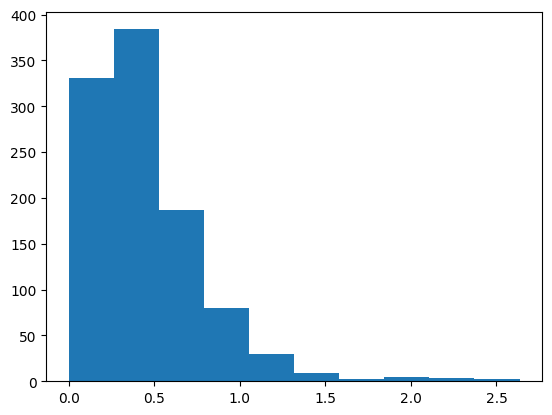

In [ ]:
# histogram for df_mod['BookMeta_DownloadsJune2015']
import matplotlib.pyplot as plt
plt.hist(df_mod['Log Transformed'], bins=10)

In [ ]:
df_mod['BookMeta_DownloadsJune2015'].describe()

,BookMeta_DownloadsJune2015
count,1035.000000
mean,327.434783
std,467.477304
min,4.000000
25%,120.000000
50%,214.000000
75%,371.000000
max,6053.000000


In [ ]:
df_mod['Log Transformed'].describe()

,Log Transformed
count,1035.000000
mean,0.447066
std,0.344309
min,0.000000
25%,0.221655
50%,0.371025
75%,0.579455
max,2.634738


In [ ]:
import pandas as pd

# Define the bins (use the min and max values from the log-transformed data)
bins = [df_mod['Log Transformed'].min(), 0.25, 0.5, 0.75, df_mod['Log Transformed'].max()]

# Define the labels for the bins
labels = ['Low', 'Medium-Low', 'Medium-High', 'High']

# Apply pd.cut() to categorize the data into 4 bins
df_mod['Popularity'] = pd.cut(df_mod['Log Transformed'], bins=bins, labels=labels)

# Display the result
print(df_mod[['Log Transformed', 'Popularity']].head())


   Log Transformed   Popularity
0         0.551506  Medium-High
1         0.426996   Medium-Low
2         0.686195  Medium-High
3         0.204368          Low
4         0.266890   Medium-Low


In [ ]:
df_mod.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1035 entries, 0 to 1376
Data columns (total 15 columns):
 #   Column                                 Non-Null Count  Dtype   
---  ------                                 --------------  -----   
 0   DATE                                   1035 non-null   int64   
 1   DocumentIdentifier                     1035 non-null   object  
 2   V2Themes                               1018 non-null   object  
 3   V2Tone                                 1035 non-null   float64 
 4   BookMeta_Title                         1035 non-null   object  
 5   BookMeta_Publisher                     1001 non-null   object  
 6   BookMeta_Subjects                      589 non-null    object  
 7   BookMeta_Language                      1035 non-null   object  
 8   BookMeta_Contributor                   1031 non-null   object  
 9   BookMeta_Sponsor                       1031 non-null   object  
 10  BookMeta_FullText                      1035 non-null   object  
 

In [ ]:
df_mod.to_csv('df_mod.csv', index=False)

# BERT

In [ ]:
import pandas as pd
df_mod = pd.read_csv('df_mod.csv')

In [ ]:
df_sub = df_mod.copy()
df_sub.head(5)

,DATE,DocumentIdentifier,V2Themes,V2Tone,BookMeta_Title,BookMeta_Publisher,BookMeta_Subjects,BookMeta_Language,BookMeta_Contributor,BookMeta_Sponsor,BookMeta_FullText,BookMeta_DownloadsJune2015,BookMeta_DownloadsJune2015_normalized,Log Transformed,Popularity
0,1800,annualregisterw09macagoog,general government,-0.183961,the annual register of world events,london new york longmans green and co,historyhistory modern,['eng'],unknown library,google,googl digit copi book preserv gener librari sh...,348.0,0.043992,0.551506,Medium-High
1,1800,clinicalpharmac00nisbgoog,tax fncact vet,-2.066482,the clinical pharmacopoeia or general principl...,printed for j johnson and j watson edinburgh...,NaN,['eng'],university of wisconsin madison,google,googl digit copi book preserv gener librari sh...,253.0,-0.159227,0.426996,Medium-Low
2,1800,lifecatharineii02tookgoog,armedconflict,0.294400,the life of catharine ii empress of russia,printed by a strahan for t n longman and o rees,NaN,['eng'],unknown library,google,googl digit copi book preserv gener librari sh...,465.0,0.294271,0.686195,Medium-High
3,1800,remarksonatourt00wigsgoog,maritime incident,0.507942,remarks on a tour to north and south wales in ...,w wigstead,NaN,['eng'],new york public library,google,digit copi book preserv gener librari shelv ca...,110.0,-0.465124,0.204368,Low
4,1800,monthlyreview131grifgoog,ideology,0.019269,the monthly review,printed for r griffiths,NaN,['eng'],new york public library,google,digit copi book preserv gener librari shelv ca...,147.0,-0.385975,0.266890,Medium-Low


In [ ]:
pip install transformers datasets torch

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from transformers import BertTokenizer
from torch.utils.data import Dataset, DataLoader
import torch
from transformers import BertForSequenceClassification, AdamW
from torch.nn import CrossEntropyLoss

# Filling missing values for now
df_sub['V2Themes'] = df_sub['V2Themes'].fillna('')
df_sub['V2Tone'] = df_sub['V2Tone'].fillna(df_sub['V2Tone'].mean())
df_sub['BookMeta_Title'] = df_sub['BookMeta_Title'].fillna('')
df_sub['BookMeta_Publisher'] = df_sub['BookMeta_Publisher'].fillna('')
df_sub['BookMeta_Subjects'] = df_sub['BookMeta_Subjects'].fillna('')
df_sub['BookMeta_Contributor'] = df_sub['BookMeta_Contributor'].fillna('')
df_sub['BookMeta_Sponsor'] = df_sub['BookMeta_Sponsor'].fillna('')
df_sub['Popularity'] = df_sub['Popularity'].astype('category')

In [ ]:
# Combine text columns into one (you can adjust which columns to use)
df_sub['text_input'] = (
    df_sub['V2Themes'] + " " + df_sub['BookMeta_Title'] + " " +
    df_sub['BookMeta_Publisher'] + " " + df_sub['BookMeta_Subjects'] + " " +
    df_sub['BookMeta_Contributor'] + " " + df_sub['BookMeta_Sponsor'] + " " +
    df_sub['BookMeta_FullText']
)

# Numeric input (V2Tone)
df_sub['V2Tone'] = df_sub['V2Tone']

# Encoding the target variable 'Popularity'
le = LabelEncoder()
df_sub['Popularity'] = le.fit_transform(df_sub['Popularity'])


In [ ]:
from sklearn.model_selection import train_test_split

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    df_sub[['text_input', 'V2Tone']], df_sub['Popularity'], test_size=0.2, random_state=42
)

# Separate text and numeric data
X_train_text = X_train['text_input'].tolist()
X_test_text = X_test['text_input'].tolist()

X_train_numeric = X_train[['V2Tone']].values
X_test_numeric = X_test[['V2Tone']].values

In [ ]:
from transformers import BertTokenizer

# Initialize the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenize the training and test text data separately
train_encodings = tokenizer(X_train_text, truncation=True, padding=True, max_length=512, return_tensors='pt')
test_encodings = tokenizer(X_test_text, truncation=True, padding=True, max_length=512, return_tensors='pt')


In [ ]:
# import torch

# # Path to save the encodings
train_encodings_path = 'train_encodings.pt'
test_encodings_path = 'test_encodings.pt'

# # Save the encodings to files
# torch.save(train_encodings, train_encodings_path)
# torch.save(test_encodings, test_encodings_path)

In [ ]:
# Load the encodings from files
train_encodings = torch.load(train_encodings_path, weights_only=False)
test_encodings = torch.load(test_encodings_path, weights_only=False)

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler to normalize numeric data
scaler = StandardScaler()

# Normalize the 'V2Tone' column
normalized_train_numeric = scaler.fit_transform(X_train_numeric)
normalized_test_numeric = scaler.transform(X_test_numeric)  # Use only fit on train data


In [ ]:
import torch
from torch.utils.data import DataLoader, TensorDataset

# Convert to PyTorch tensors for training and test data
train_data = TensorDataset(
    train_encodings['input_ids'], torch.tensor(normalized_train_numeric, dtype=torch.float32), torch.tensor(y_train.values)
)
test_data = TensorDataset(
    test_encodings['input_ids'], torch.tensor(normalized_test_numeric, dtype=torch.float32), torch.tensor(y_test.values)
)

# Create data loaders
train_loader = DataLoader(train_data, batch_size=8, shuffle=True)
test_loader = DataLoader(test_data, batch_size=8, shuffle=False)


In [ ]:
import torch.nn as nn
from transformers import BertModel

class BERTWithNumericInput(nn.Module):
    def __init__(self, bert_model_name='bert-base-uncased', num_numeric_features=1):
        super(BERTWithNumericInput, self).__init__()

        # Load pre-trained BERT
        self.bert = BertModel.from_pretrained(bert_model_name)

        # A fully connected layer to combine BERT output with numeric data
        self.fc1 = nn.Linear(self.bert.config.hidden_size + num_numeric_features, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 4)  # Output layer (since Popularity has 3 classes)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, input_ids, numeric_data):
        # BERT output
        bert_output = self.bert(input_ids).last_hidden_state.mean(dim=1)  # Pooling the BERT output (average of token embeddings)

        # Concatenate BERT output and numeric features
        combined = torch.cat((bert_output, numeric_data), dim=1)

        # Feed forward network
        x = torch.relu(self.fc1(combined))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return self.softmax(x)


In [ ]:
# from torch.optim import Adam

# # Instantiate the model
# model = BERTWithNumericInput(num_numeric_features=1)

# # Optimizer and loss function
# optimizer = Adam(model.parameters(), lr=1e-5)
# criterion = nn.CrossEntropyLoss()

# # Training loop
# for epoch in range(1):  # Iterate over epochs
#     model.train()
#     for batch in train_loader:
#         input_ids, numeric_data, labels = batch

#         optimizer.zero_grad()  # Reset gradients

#         # Forward pass
#         outputs = model(input_ids, numeric_data)
#         loss = criterion(outputs, labels)

#         # Backward pass
#         loss.backward()
#         optimizer.step()

#     print(f'Epoch {epoch + 1} complete. Loss: {loss.item()}')

# # Evaluation loop (you can calculate accuracy or other metrics here)
# model.eval()
# with torch.no_grad():
#     correct = 0
#     total = 0
#     for batch in test_loader:
#         input_ids, numeric_data, labels = batch
#         outputs = model(input_ids, numeric_data)
#         _, predicted = torch.max(outputs, 1)
#         total += labels.size(0)
#         correct += (predicted == labels).sum().item()

#     accuracy = correct / total
#     print(f'Accuracy: {accuracy}')


In [ ]:
import torch
from torch.utils.data import DataLoader, TensorDataset
import torch.nn as nn
from transformers import BertModel
from torch.optim import Adam

# Check if GPU is available and set a device
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
print(f'Using device: {device}')

# Convert to PyTorch tensors for training and test data
train_data = TensorDataset(
    train_encodings['input_ids'],
    torch.tensor(normalized_train_numeric, dtype=torch.float32),
    torch.tensor(y_train.values)
)
test_data = TensorDataset(
    test_encodings['input_ids'],
    torch.tensor(normalized_test_numeric, dtype=torch.float32),
    torch.tensor(y_test.values)
)

# Create data loaders
train_loader = DataLoader(train_data, batch_size=8, shuffle=True)
test_loader = DataLoader(test_data, batch_size=8, shuffle=False)


class BERTWithNumericInput(nn.Module):
    def __init__(self, bert_model_name='bert-base-uncased', num_numeric_features=1):
        super(BERTWithNumericInput, self).__init__()

        # Load pre-trained BERT
        self.bert = BertModel.from_pretrained(bert_model_name)

        # A fully connected layer to combine BERT output with numeric data
        self.fc1 = nn.Linear(self.bert.config.hidden_size + num_numeric_features, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 4)  # Output layer (since Popularity has 3 classes)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, input_ids, numeric_data):
        # BERT output
        bert_output = self.bert(input_ids).last_hidden_state.mean(dim=1)  # Pooling the BERT output (average of token embeddings)

        # Concatenate BERT output and numeric features
        combined = torch.cat((bert_output, numeric_data), dim=1)

        # Feed forward network
        x = torch.relu(self.fc1(combined))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return self.softmax(x)

Using device: cuda


In [ ]:
model = BERTWithNumericInput(num_numeric_features=1).to(device)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [ ]:
optimizer = Adam(model.parameters(), lr=1e-5)
criterion = nn.CrossEntropyLoss()

In [ ]:
# Training loop
for epoch in range(1):  # Iterate over epochs
    model.train()
    for batch in train_loader:
        input_ids, numeric_data, labels = batch  # Access tensors directly from the batch

        # Move data to device
        input_ids = input_ids.to(device)  # Move input_ids tensor to device
        numeric_data = numeric_data.to(device)  # Move numeric_data tensor to device
        labels = labels.to(device)  # Move labels tensor to device

        optimizer.zero_grad()  # Reset gradients

        # Forward pass
        outputs = model(input_ids, numeric_data)
        loss = criterion(outputs, labels)

        # Backward pass
        loss.backward()
        optimizer.step()

    print(f'Epoch {epoch + 1} complete. Loss: {loss.item()}')

We strongly recommend passing in an `attention_mask` since your input_ids may be padded. See https://huggingface.co/docs/transformers/troubleshooting#incorrect-output-when-padding-tokens-arent-masked.


RuntimeError: CUDA error: device-side assert triggered
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


In [ ]:
# Evaluation loop (you can calculate accuracy or other metrics here)
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for batch in test_loader:
        input_ids, numeric_data, labels = [b.to(device) for b in batch]  # Move batch to device
        outputs = model(input_ids, numeric_data)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    accuracy = correct / total
    print(f'Accuracy: {accuracy}')

RuntimeError: CUDA error: device-side assert triggered
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


In [ ]:
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'